# Crime and Safety in Three Major Ohio Cities 
# EMAT 22110 - Data in EMAT
# Author: Liam Merritt
# Created: 12/13/2021

## The question for this project is: Which city is the safest out of Akron, Columbus, and Cleveland based on criminal reports that the state of Ohio sends to the FBI? 
The data I'm using is from the [OIBRS](https://dpsoibrspext.azurewebsites.net/) (Ohio Incident Based Reporting System). This data is the criminal report data that the state of Ohio sends to the FBI each year. I chose to utilize the data of criminal reports from Cuyahoga County, Franklin County, and Summit County from 2019 and 2020. The data thankfully was able to be downloaded as a .csv file so I just looked up specific counties and crimes per year and then downloaded the csv file and imported it below. I'll try to take the city level data of Cleveland, Columbus, and Akron and make an appropriate data visualization by using pandas DataFrames. 

# Wrangling the Data

### Starting the Process

In [1]:
import pandas as pd
import json

### Finding the file and opening the files for analysis

In [2]:
ls

'likes' Report - Liam Merritt.ipynb
10-26-21 & 10-28-21 Notes .ipynb
BLS Data Call.ipynb
Data in EMAT 9-21-21 Notes.ipynb
Equal_Track_Data.csv
Final Project - Analysis Plan - Merritt, Liam.ipynb
Final Project - Data in Hand - Merritt, Liam.ipynb
Final Project - Preliminary Draft - Merritt, Liam.ipynb
HipHopAPP_keys.txt
Indeed Scraper.ipynb
Markdown Cheat Sheet.ipynb
Notes 10-19-21 - Data Scraping.ipynb
Notes 9-23-2021 & 9-28-2021 & 9-30-2021 - Data In Emat.ipynb
Notes 9-30-2021 Data In EMAT.ipynb
Olympics_Postponed_Twitter_Unique.csv
Pandas Notes 9-14-21.ipynb
SQL Notes - 10-7-21.ipynb
Spotify Session Notes.ipynb
Statistical Tests - 11-2-21 & 11-4-21 Notes.ipynb
Text Processing - 12-2-2021 & 12-4-2021 Notes.ipynb
Twitter API Notes.ipynb
Twitter Text Report Liam Merritt.ipynb
Twitter_API_key.txt
bls_data.csv
cuyahoga_county_criminal_data_2019.csv
cuyahoga_county_criminal_data_2020.csv
franklin_county_criminal_data_2019.csv
franklin_county_criminal_data_2020.csv
health_tweet_data.csv
sum

#### Defining a global function called percapita that allows me to divide columns in order to be able to create the Violent Crimes per Capita and the Property Crimes per Capita as columns called VC/1000 and PC/1000. The VC/1000 and PC/1000 are shown as a float that represents the violent and property crimes per 1000 residents of each given city. 
#### I used 1000 because I tried using 100,000 and the number was fairly high so I wanted to make the data more understandable for the data analysis. I also had the float result rounded to 2 places in order to make it more understandable as well and less bulky in the dataframes. I chose the per/1000 metric because I wanted to utilize a number that is more apt to visualization when looking at graphs in the data analysis and makes more sense to a layman or manager that may need to understand the data more simply.

In [3]:
def percapita(x, y):
    return round((x / y) * 1000, 2)

## Cuyahoga County - Cleveland Data

#### Here's the 2019-2020 Cuyahoga County crime data in two pandas DataFrames. I'm going to use the .drop, .set_index, and .rename methods to create more suitable datasets that just show the crimes in Cleveland. I'm going to create 2 datasets for the crimes in Cleveland in 2019 and the crimes in 2020.

In [4]:
cuyahoga_2019_crimes = pd.read_csv("cuyahoga_county_criminal_data_2019.csv", header = 1)
cuyahoga_2020_crimes = pd.read_csv("cuyahoga_county_criminal_data_2020.csv", header = 1)

In [5]:
cuyahoga_2019_crimes = cuyahoga_2019_crimes.drop(columns='Unnamed: 11')
cuyahoga_2019_crimes

,AgencyName,Population,ViolentCrimeTotal,Murder,Rape,Robbery,AggravatedAssault,PropertyCrimeTotal,Burglary,LarcenyTheft,MotorVehicleTheft
0,Bay Village,15235,4,1,0,0,3,78,11,62,5
1,Beachwood,11612,13,0,3,2,8,470,16,438,16
2,Brecksville,13614,2,0,0,0,2,114,33,77,4
3,Broadview Heights,19156,7,0,0,2,5,25,1,22,2
4,Chagrin Falls,3941,1,0,0,1,0,50,16,34,0
5,Cleveland,381829,6075,103,534,2003,3435,20552,4561,12912,3079
6,Cleveland Heights,44098,125,2,8,35,80,730,111,553,66
7,Cleveland Metroparks Ranger Department,0,13,2,3,4,4,106,2,92,12
8,Cleveland RTA,0,32,0,1,18,13,138,1,137,0
9,Cuyahoga County Sheriff's Office,0,25,1,1,1,22,23,2,21,0


In [6]:
cuyahoga_2020_crimes = cuyahoga_2020_crimes.drop(columns='Unnamed: 11')
cuyahoga_2020_crimes

,AgencyName,Population,ViolentCrimeTotal,Murder,Rape,Robbery,AggravatedAssault,PropertyCrimeTotal,Burglary,LarcenyTheft,MotorVehicleTheft
0,Bay Village,15135,6,0,1,0,5,130,8,106,16
1,Beachwood,11547,23,0,3,7,13,383,15,348,20
2,Berea,18539,24,0,2,9,13,148,17,125,6
3,Brecksville,13591,2,0,0,0,2,61,2,54,5
4,Broadview Heights,19059,12,0,0,0,12,20,2,14,4
5,Brooklyn,10584,12,0,0,5,7,500,33,435,32
6,Chagrin Falls,3921,0,0,0,0,0,43,3,31,9
7,Cleveland,379121,7089,160,436,1908,4585,18676,4056,11336,3284
8,Cleveland Heights,43725,131,6,10,21,94,564,64,420,80
9,Cleveland Metroparks Ranger Department,0,14,0,3,4,7,86,2,77,7


#### Cleaning up the datasets to make two smaller datasets that only include the Cleveland data, and renaming the index of each dataset to differentiate between them when conducting my analyses. Also uses the global percapita function from above to create the new columns for VC/1000 and PC/1000. The VC/1000 is violent crimes per 1,000 people and the PC/1000 is property crimes per 1,000 people.

**2019:**

In [7]:
clv_2019 = cuyahoga_2019_crimes.iloc[[5],:]

In [8]:
clv_2019 = clv_2019.rename(columns={'AgencyName': 'Agency: 2019', 'AggravatedAssault': 'Assault'})
## Shortened Aggravated Assault in order to not have to scroll to see the whole DataFrame ##

In [9]:
clv_2019 = clv_2019.set_index('Agency: 2019')

In [10]:
clv_2019['VC/1000'] = percapita(clv_2019['ViolentCrimeTotal'], clv_2019['Population'])

In [11]:
clv_2019['PC/1000'] = percapita(clv_2019['PropertyCrimeTotal'], clv_2019['Population'])

**2020:**

In [12]:
clv_2020 = cuyahoga_2020_crimes.iloc[[7],:]

In [13]:
clv_2020 = clv_2020.rename(columns={'AgencyName': 'Agency: 2020', 'AggravatedAssault': 'Assault'})
## Shortened Aggravated Assault in order to not have to scroll to see the whole DataFrame ##

In [14]:
clv_2020 = clv_2020.set_index('Agency: 2020')

In [15]:
clv_2020['VC/1000'] = percapita(clv_2020['ViolentCrimeTotal'], clv_2020['Population'])

In [16]:
clv_2020['PC/1000'] = percapita(clv_2020['PropertyCrimeTotal'], clv_2020['Population'])

### Final DataFrames showing 2019 and 2020 criminal report data from the city of Cleveland.

**2019:**

In [17]:
clv_2019

,Population,ViolentCrimeTotal,Murder,Rape,Robbery,Assault,PropertyCrimeTotal,Burglary,LarcenyTheft,MotorVehicleTheft,VC/1000,PC/1000
Agency: 2019,,,,,,,,,,,,
Cleveland,381829,6075,103,534,2003,3435,20552,4561,12912,3079,15.91,53.83


**2020:**

In [18]:
clv_2020

,Population,ViolentCrimeTotal,Murder,Rape,Robbery,Assault,PropertyCrimeTotal,Burglary,LarcenyTheft,MotorVehicleTheft,VC/1000,PC/1000
Agency: 2020,,,,,,,,,,,,
Cleveland,379121,7089,160,436,1908,4585,18676,4056,11336,3284,18.7,49.26


## Franklin County - Columbus Data

#### Here's the 2019-2020 Franklin County crime data in two pandas DataFrames. I'm going to use the .drop, .set_index, and .rename methods to create more suitable datasets that just show the crimes in Columbus. I'm going to create 2 datasets for the crimes in Columbus in 2019 and the crimes in 2020.

In [19]:
franklin_2019_crimes = pd.read_csv("franklin_county_criminal_data_2019.csv", header = 1)
franklin_2020_crimes = pd.read_csv("franklin_county_criminal_data_2020.csv", header = 1)

In [20]:
franklin_2019_crimes = franklin_2019_crimes.drop(columns='Unnamed: 11')
franklin_2019_crimes

,AgencyName,Population,ViolentCrimeTotal,Murder,Rape,Robbery,AggravatedAssault,PropertyCrimeTotal,Burglary,LarcenyTheft,MotorVehicleTheft
0,Bexley,13956,12,0,3,4,5,303,64,230,9
1,Capital University,0,4,0,4,0,0,45,15,28,2
2,Columbus,906120,4990,101,926,1915,2048,30714,5861,21150,3703
3,Dublin,49626,25,0,13,3,9,439,60,351,28
4,Gahanna,35847,53,1,11,13,28,740,53,655,32
5,Grandview Heights,8581,10,1,4,1,4,202,54,142,6
6,Grove City,42423,38,1,13,17,7,1199,85,1065,49
7,Groveport,5679,12,1,1,3,7,119,10,79,30
8,Hilliard,37578,31,0,8,6,17,257,33,202,22
9,Madison Township (Franklin),19682,31,0,4,9,18,206,46,135,25


In [21]:
franklin_2020_crimes = franklin_2020_crimes.drop(columns='Unnamed: 11')
franklin_2020_crimes

,AgencyName,Population,ViolentCrimeTotal,Murder,Rape,Robbery,AggravatedAssault,PropertyCrimeTotal,Burglary,LarcenyTheft,MotorVehicleTheft
0,Capital University,0,0,0,0,0,0,23,5,11,7
1,Columbus,911383,5892,176,881,1944,2891,29564,5728,20410,3426
2,Dublin,49954,26,1,11,4,10,420,56,326,38
3,Gahanna,35738,61,1,15,13,32,647,66,526,55
4,Grandview Heights,8566,4,1,0,0,3,185,29,145,11
5,Grove City,42551,89,1,5,27,56,1113,62,973,78
6,Groveport,5649,16,0,0,4,12,115,8,101,6
7,Hilliard,37585,28,0,6,11,11,290,39,227,24
8,Madison Township (Franklin),19828,30,0,6,7,17,176,40,106,30
9,Minerva Park,1326,0,0,0,0,0,21,2,18,1


#### Now, I'll clean up the data like before to output two datasets that represent the Columbus area criminal data in 2019 and 2020. I'll also use the global percapita function from above to create the new columns for VC/1000 and PC/1000. The VC/1000 is violent crimes per 1,000 people and the PC/1000 is property crimes per 1,000 people.

**2019:**

In [22]:
cbus_2019 = franklin_2019_crimes.iloc[[2],:]

In [23]:
cbus_2019 = cbus_2019.rename(columns={'AgencyName': 'Agency: 2019', 'AggravatedAssault': 'Assault'})
## Shortened Aggravated Assault in order to not have to scroll to see the whole DataFrame ##

In [24]:
cbus_2019 = cbus_2019.set_index('Agency: 2019')

In [25]:
cbus_2019['VC/1000'] = percapita(cbus_2019['ViolentCrimeTotal'], cbus_2019['Population'])

In [26]:
cbus_2019['PC/1000'] = percapita(cbus_2019['PropertyCrimeTotal'], cbus_2019['Population'])

**2020:**

In [27]:
cbus_2020 = franklin_2020_crimes.iloc[[1],:]

In [28]:
cbus_2020 = cbus_2020.rename(columns={'AgencyName': 'Agency: 2020', 'AggravatedAssault': 'Assault'})
## Shortened Aggravated Assault in order to not have to scroll to see the whole DataFrame ##

In [29]:
cbus_2020 = cbus_2020.set_index('Agency: 2020')

In [30]:
cbus_2020['VC/1000'] = percapita(cbus_2020['ViolentCrimeTotal'], cbus_2020['Population'])

In [31]:
cbus_2020['PC/1000'] = percapita(cbus_2020['PropertyCrimeTotal'], cbus_2020['Population'])

### Final DataFrames showing 2019 and 2020 criminal report data from the city of Columbus.

**2019:**

In [32]:
cbus_2019

,Population,ViolentCrimeTotal,Murder,Rape,Robbery,Assault,PropertyCrimeTotal,Burglary,LarcenyTheft,MotorVehicleTheft,VC/1000,PC/1000
Agency: 2019,,,,,,,,,,,,
Columbus,906120,4990,101,926,1915,2048,30714,5861,21150,3703,5.51,33.9


**2020:**

In [33]:
cbus_2020

,Population,ViolentCrimeTotal,Murder,Rape,Robbery,Assault,PropertyCrimeTotal,Burglary,LarcenyTheft,MotorVehicleTheft,VC/1000,PC/1000
Agency: 2020,,,,,,,,,,,,
Columbus,911383,5892,176,881,1944,2891,29564,5728,20410,3426,6.46,32.44


## Summit County - Akron Data

#### Here's the 2019-2020 Summit County crime data in two pandas DataFrames. I'm going to use the .drop, .set_index, and .rename methods to create more suitable datasets that just show the crimes in Akron. I'm going to create 2 datasets for the crimes in Akron in 2019 and the crimes in 2020.

In [34]:
summit_2019_crimes = pd.read_csv("summit_county_criminal_data_2019.csv", header = 1)
summit_2020_crimes = pd.read_csv("summit_county_criminal_data_2020.csv", header = 1)

In [35]:
summit_2019_crimes = summit_2019_crimes.drop(columns='Unnamed: 11')
summit_2019_crimes

,AgencyName,Population,ViolentCrimeTotal,Murder,Rape,Robbery,AggravatedAssault,PropertyCrimeTotal,Burglary,LarcenyTheft,MotorVehicleTheft
0,Akron,197882,1746,36,208,351,1151,8050,1819,5491,740
1,Barberton,26015,72,2,15,11,44,698,112,554,32
2,Bath Township (Summit),9659,5,0,1,1,3,149,13,134,2
3,Copley Township,17309,15,0,6,0,9,199,20,162,17
4,Hudson,22286,8,0,3,1,4,119,13,103,3
5,Lakemore,3082,10,0,5,0,5,109,16,90,3
6,Munroe Falls,5080,0,0,0,0,0,27,1,26,0
7,New Franklin,14162,10,0,3,2,5,92,23,63,6
8,Northfield,3670,7,0,1,1,5,30,2,27,1
9,Norton,12007,20,0,4,3,13,205,36,147,22


In [36]:
summit_2020_crimes = summit_2020_crimes.drop(columns='Unnamed: 11')
summit_2020_crimes

,AgencyName,Population,ViolentCrimeTotal,Murder,Rape,Robbery,AggravatedAssault,PropertyCrimeTotal,Burglary,LarcenyTheft,MotorVehicleTheft
0,Akron,197433,2110,50,242,295,1523,8809,1710,6088,1011
1,Barberton,25890,67,2,18,9,38,671,133,487,51
2,Bath Township (Summit),9635,7,0,0,2,5,122,7,107,8
3,Boston Heights,1313,1,0,0,0,1,1,1,0,0
4,Copley Township,17280,13,1,4,2,6,241,26,191,24
5,Hudson,22234,5,0,1,0,4,159,24,131,4
6,Lakemore,3072,4,1,0,0,3,59,9,46,4
7,Macedonia,12098,32,0,1,3,28,217,8,196,13
8,Munroe Falls,5064,1,0,0,1,0,31,6,24,1
9,New Franklin,14125,10,0,3,2,5,96,22,67,7


#### Now, I'll clean up the data like before to output two datasets that represent the Akron area criminal data in 2019 and 2020. I'll also use the global percapita function from above to create the new columns for VC/1000 and PC/1000. The VC/1000 is violent crimes per 1,000 people and the PC/1000 is property crimes per 1,000 people.

**2019:**

In [37]:
akr_2019 = summit_2019_crimes.iloc[[0],:]

In [38]:
akr_2019 = akr_2019.rename(columns={'AgencyName': 'Agency: 2019', 'AggravatedAssault': 'Assault'})
## Shortened Aggravated Assault in order to not have to scroll to see the whole DataFrame ##

In [39]:
akr_2019 = akr_2019.set_index('Agency: 2019')

In [40]:
akr_2019['VC/1000'] = percapita(akr_2019['ViolentCrimeTotal'], akr_2019['Population'])

In [41]:
akr_2019['PC/1000'] = percapita(akr_2019['PropertyCrimeTotal'], akr_2019['Population'])

**2020:**

In [42]:
akr_2020 = summit_2020_crimes.iloc[[0],:]

In [43]:
akr_2020 = akr_2020.rename(columns={'AgencyName': 'Agency: 2020', 'AggravatedAssault': 'Assault'})
## Shortened Aggravated Assault in order to not have to scroll to see the whole DataFrame ##

In [44]:
akr_2020 = akr_2020.set_index('Agency: 2020')

In [45]:
akr_2020['VC/1000'] = percapita(akr_2020['ViolentCrimeTotal'], akr_2020['Population'])

In [46]:
akr_2020['PC/1000'] = percapita(akr_2020['PropertyCrimeTotal'], akr_2020['Population'])

### Final DataFrames showing 2019 and 2020 criminal report data from the city of Akron.

**2019:**

In [47]:
akr_2019

,Population,ViolentCrimeTotal,Murder,Rape,Robbery,Assault,PropertyCrimeTotal,Burglary,LarcenyTheft,MotorVehicleTheft,VC/1000,PC/1000
Agency: 2019,,,,,,,,,,,,
Akron,197882,1746,36,208,351,1151,8050,1819,5491,740,8.82,40.68


**2020:**

In [48]:
akr_2020

,Population,ViolentCrimeTotal,Murder,Rape,Robbery,Assault,PropertyCrimeTotal,Burglary,LarcenyTheft,MotorVehicleTheft,VC/1000,PC/1000
Agency: 2020,,,,,,,,,,,,
Akron,197433,2110,50,242,295,1523,8809,1710,6088,1011,10.69,44.62


# Analyis Plan

My plan is to use bar graphs and examine 2 different DataFrames for 2019 and 2020 to differentiate the years and draw conclusions between the two years as well as showing the difference in crime rates between the respective cities and to find out whether crime is rising or going down over time.

## Finding the aggregated data for each city per year

I found [this](https://stackoverflow.com/a/68541450) helpful for loop and changed up the variables to make it more understandable when aggregating the data of the three cities for each year. I did this in order to allow for some analysis to be done by comparing each city against each other in terms of safety and comparing the years 2019 and 2020 to see if anything has changed. I also want to see if the cities are becoming more dangerous based on VC/1000 and PC/1000 ratings over time.

In [49]:
data_2019 = [cbus_2019, akr_2019, clv_2019]
data_2020 = [cbus_2020, akr_2020, clv_2020]

tricity_crime_2019 = pd.DataFrame()
tricity_crime_2020 = pd.DataFrame()

for df in data_2019:
    tricity_crime_2019 = tricity_crime_2019.append(df)

for df in data_2020:
    tricity_crime_2020 = tricity_crime_2020.append(df)

**2019:**

In [50]:
tricity_crime_2019

,Population,ViolentCrimeTotal,Murder,Rape,Robbery,Assault,PropertyCrimeTotal,Burglary,LarcenyTheft,MotorVehicleTheft,VC/1000,PC/1000
Agency: 2019,,,,,,,,,,,,
Columbus,906120,4990,101,926,1915,2048,30714,5861,21150,3703,5.51,33.90
Akron,197882,1746,36,208,351,1151,8050,1819,5491,740,8.82,40.68
Cleveland,381829,6075,103,534,2003,3435,20552,4561,12912,3079,15.91,53.83


**2020:**

In [51]:
tricity_crime_2020

,Population,ViolentCrimeTotal,Murder,Rape,Robbery,Assault,PropertyCrimeTotal,Burglary,LarcenyTheft,MotorVehicleTheft,VC/1000,PC/1000
Agency: 2020,,,,,,,,,,,,
Columbus,911383,5892,176,881,1944,2891,29564,5728,20410,3426,6.46,32.44
Akron,197433,2110,50,242,295,1523,8809,1710,6088,1011,10.69,44.62
Cleveland,379121,7089,160,436,1908,4585,18676,4056,11336,3284,18.70,49.26


## Plotting the data

I'll use matplotlib in order to make some bar graphs that I can use to compare VC/1000 and PC/1000 rates between the three different cities and to compare the two years against each other to see how crime rates have changed from 2019 to 2020.

In [52]:
from matplotlib import pyplot as plt
import numpy as np

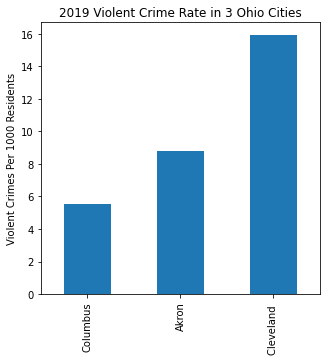

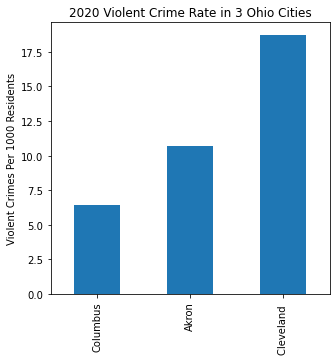

In [53]:
tricity_crime_2019['VC/1000'].plot.bar(y='VC/1000', ylabel='Violent Crimes Per 1000 Residents', figsize=(5,5), xlabel="", title="2019 Violent Crime Rate in 3 Ohio Cities")

plt.show()

tricity_crime_2020['VC/1000'].plot.bar(y='VC/1000', ylabel='Violent Crimes Per 1000 Residents', figsize=(5,5), xlabel="", title="2020 Violent Crime Rate in 3 Ohio Cities")

plt.show()

### Analysis of 2019 and 2020 Violent Crime Data:

My original question was: Which city is the safest out of Akron, Columbus, and Cleveland, based solely upon criminal report data?

The Violent Crime rate in all three cities has gone up. The bar graphs show that Cleveland is the most likely place out of the three cities to fall victim to a violent crime. When looking at the crime rate per 1000 residents, I can disregard the population size of the cities because each city is evaluated on the amount of crimes reported versus the amount of residents. The data clearly shows that the violent crime rate per 1000 residents has gone up in each jurisdiction that was analyzed from year 2019 to year 2020. Each city has seen a rise in crime, however Columbus has seen the least rise while also gaining 5000 residents. Cleveland has seen the highest rise which becomes even more statistically significant when factoring in that Cleveland has lost approximately 2000 residents during the years in question. Akron has also seen a rise in crime with a loss of about 400 residents. I would say that based solely upon the data above Columbus seems to be the safest city in terms of being a victim of violent crime.

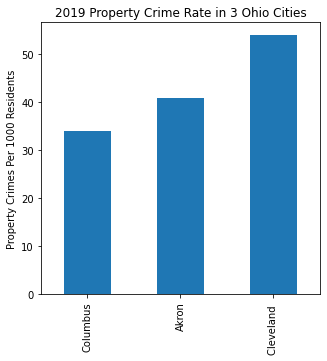

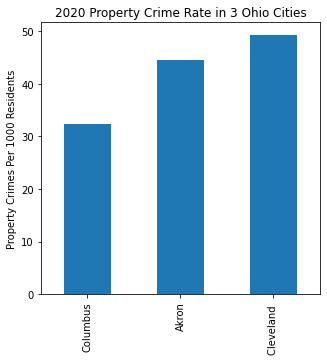

In [54]:
tricity_crime_2019['PC/1000'].plot.bar(y='VC/1000', ylabel='Property Crimes Per 1000 Residents', figsize=(5,5), xlabel="", title="2019 Property Crime Rate in 3 Ohio Cities")

plt.show()

tricity_crime_2020['PC/1000'].plot.bar(y='VC/1000', ylabel='Property Crimes Per 1000 Residents', figsize=(5,5), xlabel="", title="2020 Property Crime Rate in 3 Ohio Cities")

plt.show()

### Analysis of 2019 and 2020 Property Crime Data:

My original question was: Which city is the safest out of Akron, Columbus, and Cleveland, based solely upon criminal report data?

The property crime rate has risen from 2019 to 2020 in Akron. Property crimes have gone down only slightly in Columbus  and Cleveland. However, when examining my question about the safest city, Columbus still shines as the more likely candidate to be chosen because it's the only city of the three that saw a drop in criminality across property and violent crimes. The metric I'm using to determine the degree of safety is the likelihood of crime per 1000 residents. When examining the safety of a city from just that criteria I would say that Columbus is the safest because the property crime rate is lower there than the other cities and it's also declined from 2019 to 2020.

## Weaknesses/Limitations/Questions:

**Weaknesses/Limitations:** There are some weaknesses and limitations in using only 3 cities and only 2 years worth of data. I believe that if I used more years and more cities while still evaluating the VC/1000 and PC/1000 for each jurisdiction I could achieve more statistically significant results. I also had the limitation of not knowing whether the data for each county was skewed by the database or whether some crimes were reported but never led to a conviction. I think that there was some value in looking at the OIBRS data, however I could have potentially looked for other datasets that also speak to the crime rates overall as opposed to breaking them down into violent and property crime categories. I also could have made a different DataFrame with pandas that included only one year but many cities around the United States to see how the cities of Ohio compare to the danger in cities across the US. There are many further weaknesses and limitations but these seem to be the major figures that could possibly skew the original question as to which of Ohio's cities is the most dangerous.

**Further Questions:** How would using different cities of Ohio and more years of data from the OIBRS database affect the analyzation of the safety levels in cities across Ohio? What other categories besides VC/1000 and PC/1000 could I have used to determine the dangerousness of each city out of the three that I chose? Which other cities might add a bonus of statistical significance when analyzing the dangerousness of Ohio's cities? How do population changes amongst the cities affect criminality and the safety of each respective municipality? These questions and many more could have led to a broader understanding of the safety of Ohio's cities, however the conclusion below does find one statistically significant output to say that I may be on the right track with my analyses.

## Conclusion - Testing the Statistical Significance of the Data with Chi-Square Tests:

**Null Hypothesis:** The three cities Akron, Cleveland, and Columbus can't be evaluated to determine which city is the safest based upon the criminal and property crime rate per 1000 residents.

**Strong Hypothesis:** Cleveland will be the most dangerous city based upon the violent and property crime reports from 2019 and 2020.

In [55]:
from scipy import stats

**2019:**

In [56]:
stats.chisquare(tricity_crime_2019['VC/1000'])

Power_divergenceResult(statistic=5.601329365079365, pvalue=0.06076965666840861)

In [57]:
stats.chisquare(tricity_crime_2019['PC/1000'])

Power_divergenceResult(statistic=4.79788022739662, pvalue=0.09081415497784144)

According to the Chi-Square tests of the property and violent crime statistics from 2019 the p-value results are both above 0.05 which means they're not statistically significant so I can't reject the null hypothesis of the test having statistical significance. The null hypothesis in this case being that each of the violent and property crimes could be utilized to determine which city is the safest. Although the graphs look significant and the criminal data was very close to 0.05, according to the Chi-Square test I can't definitively say that Cleveland is more dangerous than the others based on the limited data.

**2020:**

In [59]:
stats.chisquare(tricity_crime_2020['VC/1000'])

Power_divergenceResult(statistic=6.467799163179917, pvalue=0.03940354147403203)

In [60]:
stats.chisquare(tricity_crime_2020['PC/1000'])

Power_divergenceResult(statistic=3.584502849905004, pvalue=0.16658469421098826)

According to the Chi-Square tests of the violent and property crime statistics from 2020, the p-value of violent crimes was under 0.05 at 0.039 so I can reject the null hypothesis that it won't be possible to evaluate the cities for which one is the most dangerous based on the data. In this case of 2020's VC/1000 rate I can say that Cleveland may be able to be evaluated as the most dangerous since I'm able to reject the null hypothesis. The property crime data is less conclusive as it's above 0.05 at a value of 0.16 so I can't reject the null hypothesis which means I can't make any specific determinations as to which city is the most dangerous based upon the limited data available.

The 2020 rate of violent crimes led to a statistically significant p-value result. I would say with moderate confidence that the violent crime rate in 2020 is an acceptable way to determine which city is the most dangerous because of this Chi-Square test analysis.